<a href="https://colab.research.google.com/github/HeydarAbdurahmanov/Store_Sales_and_Profit_Analysis/blob/main/Store_Sales_and_Profit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv("/content/Sample - Superstore.csv", encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


The dataset has an order date column. We can use this column to create new columns like order month, order year, and order day, which will be very valuable for sales and profit analysis according to time periods.

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day of Week'] = df['Order Date'].dt.dayofweek

Now let’s have a look at the monthly sales:


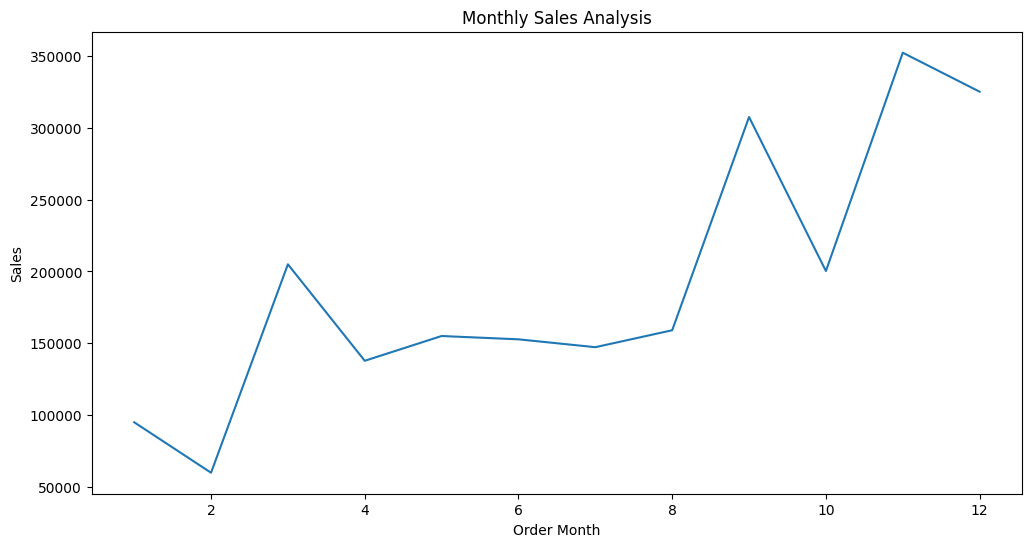

In [ ]:
sales_by_month = df.groupby('Order Month')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_month, x='Order Month', y='Sales')
plt.title('Monthly Sales Analysis')
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.show()


Now let’s have a look at the sales by category:

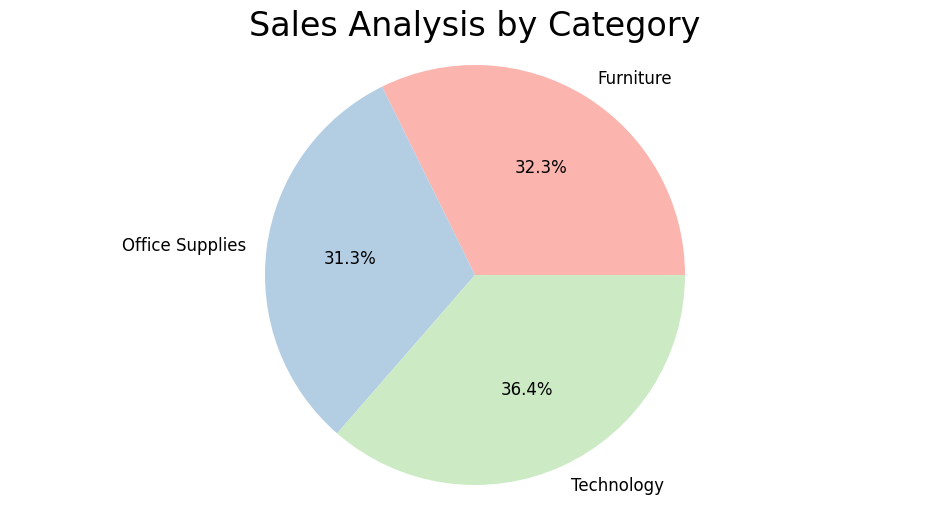

In [ ]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.title('Sales Analysis by Category', fontsize=24)

custom_palette = sns.color_palette('Pastel1', len(sales_by_category))
plt.pie(sales_by_category['Sales'], labels=sales_by_category['Category'], autopct='%1.1f%%', colors=custom_palette, textprops={'fontsize': 12})

plt.axis('equal')
plt.show()


Now let’s have a look at the sales by sub-category:

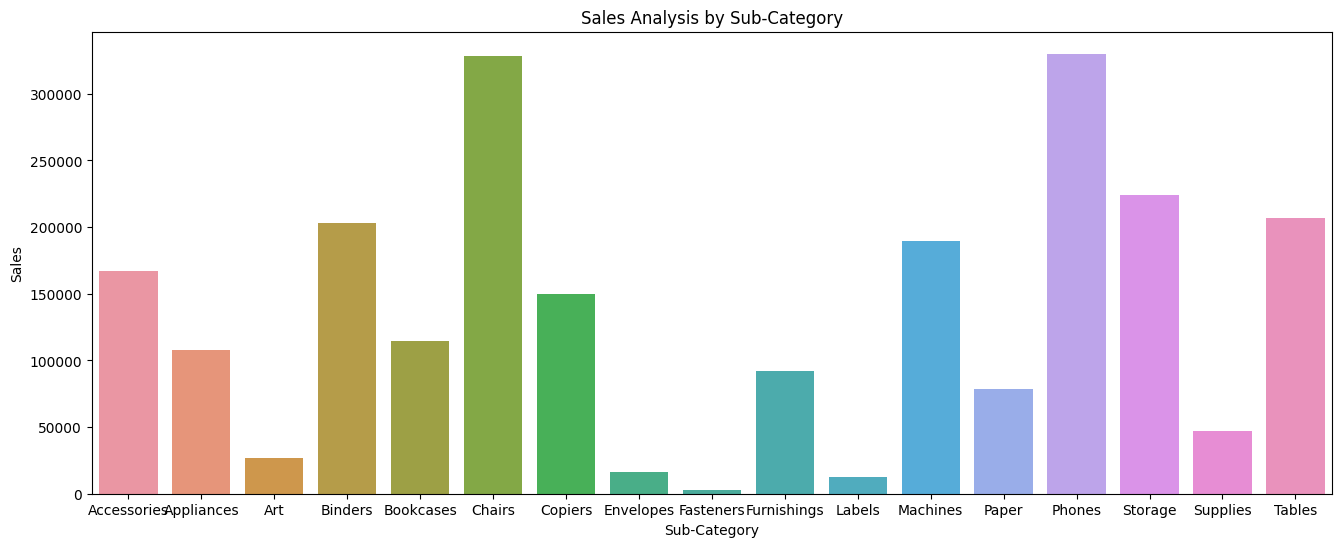

In [ ]:
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().reset_index()

plt.figure(figsize=(16, 6))
sns.barplot(x='Sub-Category', y='Sales', data=sales_by_subcategory)
plt.title('Sales Analysis by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')

plt.show()


Now let’s have a look at the monthly profits:

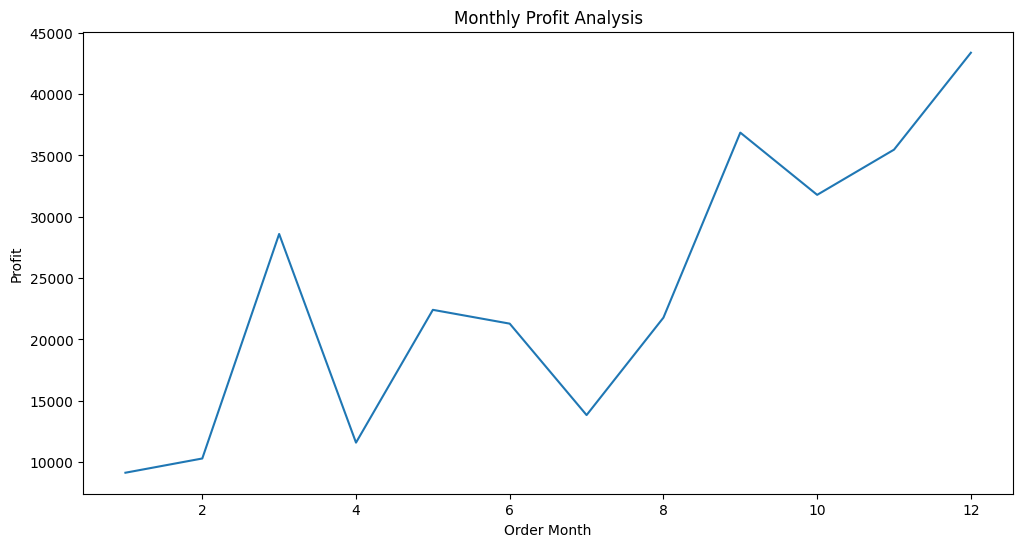

In [ ]:
profit_by_month = df.groupby('Order Month')['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Month', y='Profit', data=profit_by_month)
plt.title('Monthly Profit Analysis')
plt.xlabel('Order Month')
plt.ylabel('Profit')

plt.show()


Now let’s have a look at the profit by category:

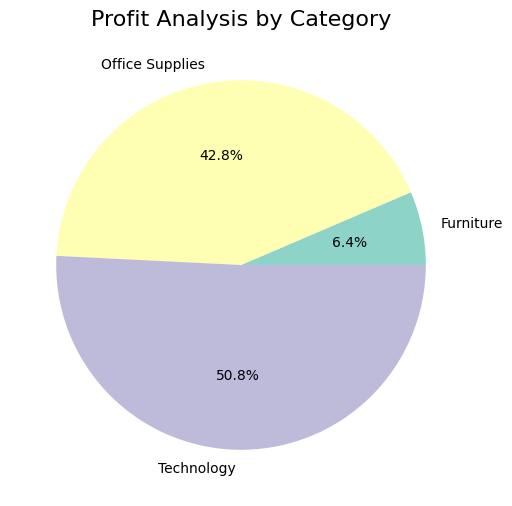

In [ ]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.set_palette('Set3')
plt.pie(profit_by_category['Profit'], labels=profit_by_category['Category'], autopct='%1.1f%%')
plt.title('Profit Analysis by Category', fontsize=16)

plt.show()


Now let’s have a look at the profit by sub-category:

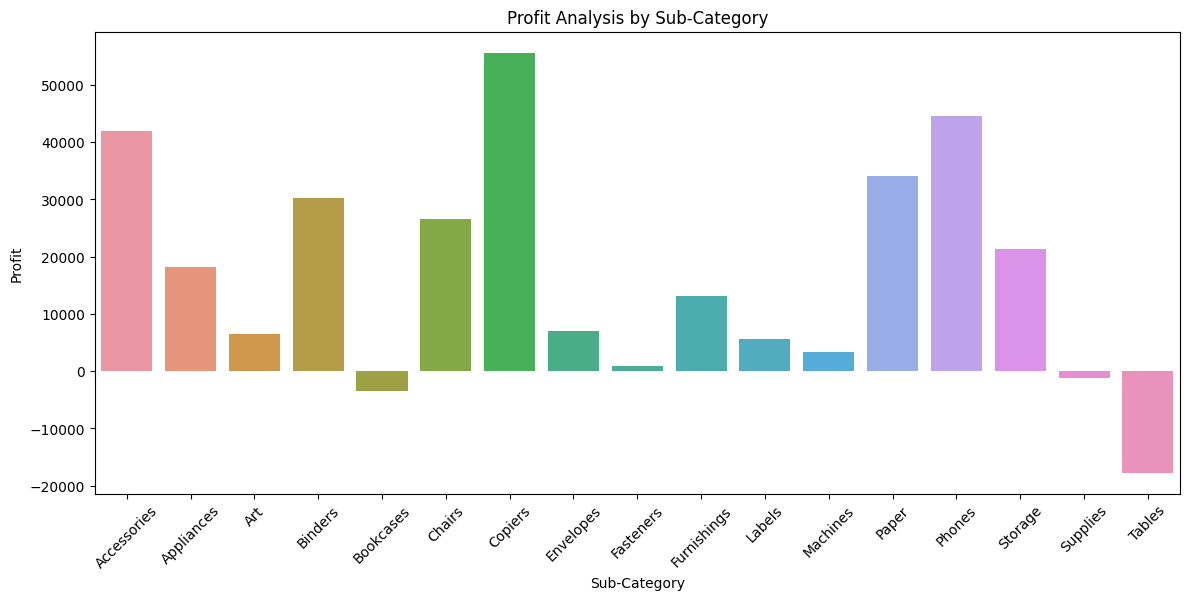

In [ ]:
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='Sub-Category', y='Profit', data=profit_by_subcategory)
plt.title('Profit Analysis by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()


Now let’s have a look at the sales and profit analysis by customer segments:

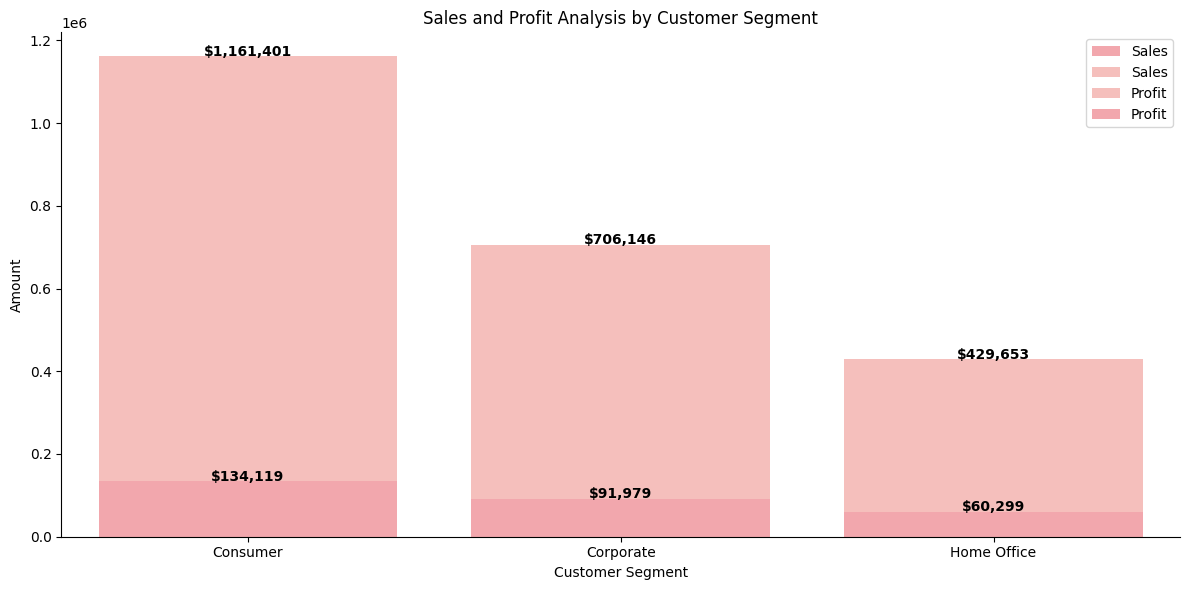

In [ ]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = ["#FF9AA2", "#FFB7B2"]  # Define your desired color palette

plt.figure(figsize=(12, 6))

sns.barplot(x='Segment', y='Sales', data=sales_profit_by_segment, color=color_palette[0], label='Sales')
sns.barplot(x='Segment', y='Profit', data=sales_profit_by_segment, color=color_palette[1], label='Profit')

# Add data labels
for i in range(len(sales_profit_by_segment)):
    plt.text(x=i, y=sales_profit_by_segment['Sales'][i] + 1000, s=f"${sales_profit_by_segment['Sales'][i]:,.0f}",
             ha='center', fontweight='bold')
    plt.text(x=i, y=sales_profit_by_segment['Profit'][i] + 1000, s=f"${sales_profit_by_segment['Profit'][i]:,.0f}",
             ha='center', fontweight='bold')

plt.title('Sales and Profit Analysis by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Amount')

plt.legend()

# Customize aesthetics
sns.despine()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()


So the store has higher profits from the product sales for consumers, but the profit from corporate product sales is better in the sales-to-profit ratio. Let’s have a look at it to validate our findings:

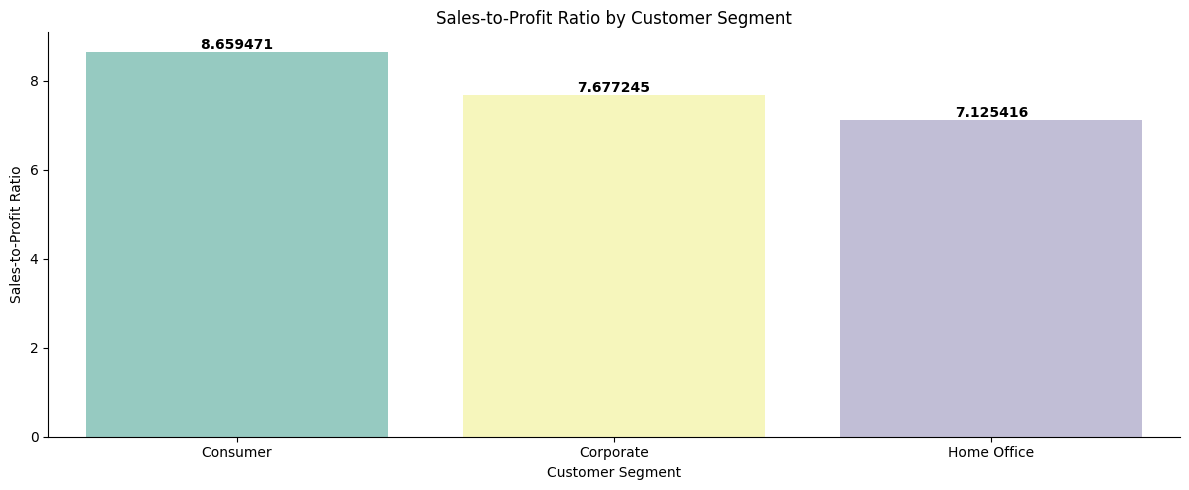

In [ ]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']

plt.figure(figsize=(12, 5))
sns.barplot(x='Segment', y='Sales_to_Profit_Ratio', data=sales_profit_by_segment)

plt.title('Sales-to-Profit Ratio by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales-to-Profit Ratio')

# Add value labels to the bars
for index, row in sales_profit_by_segment.iterrows():
    plt.text(x=index, y=row['Sales_to_Profit_Ratio'], s=f'{row["Sales_to_Profit_Ratio"]:.6f}',
             ha='center', va='bottom', fontweight='bold')

# Customize aesthetics
sns.despine()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()


Store sales and profit analysis help businesses identify areas for improvement and make data-driven decisions to optimize their operations, pricing, marketing, and inventory management strategies to drive revenue and growth.